In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import dataframe_image as dfi

In [86]:
layers_to_test = [[1024, 1 , 5], [1024, 5 , 5], [1024, 10 , 5] , [1024, 50 , 5], [1024, 100 , 5]]
f_score = []
acc_list = []
for layer_info in layers_to_test:
    result = "results/part_b/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report = pd.read_csv(result + '.csv')
    dfi.export(report, result + ".png")
    f_score.append(report.iloc[7]['f1-score'])
    acc_list.append(report.iloc[5][1])

In [88]:
report

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.938865,0.968468,0.953437,222.000
1,1,0.818182,0.786408,0.801980,206.000
2,2,0.628141,0.714286,0.668449,175.000
3,3,0.663102,0.599034,0.629442,207.000
4,4,0.775401,0.763158,0.769231,190.000
5,accuracy,0.771000,0.771000,0.771000,0.771
6,macro avg,0.764738,0.766271,0.764508,1000.000
7,weighted avg,0.771486,0.771000,0.770298,1000.000


In [87]:
acc_list

[0.659, 0.676, 0.731, 0.774, 0.771]

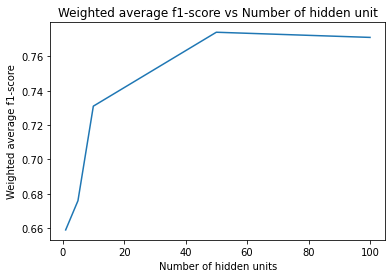

In [89]:
plt.plot([1,5,10,50,100], acc_list)
plt.xlabel("Number of hidden units")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden unit")
plt.savefig("results/part_b/average_accuracy_vs_hidden_layers.png")

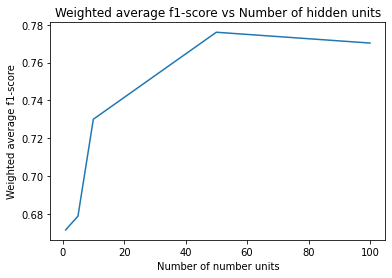

In [49]:
plt.plot([1,5,10,50,100], f_score)
plt.xlabel("Number of number units")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden units")
plt.savefig("results/part_b/weighted_f_vs_hidden_layers.png")

In [24]:
from helper import load, get_metric
trainX, trainY, testX, testY = load()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
import pickle
from NeuralNetwork import NeuralNetwork
for layer_info in layers_to_test:
        model_name = "models/part_b/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid.pickle"
        with open(model_name,'rb') as f:
                model_dict = pickle.load(f)
        model_dict['layers_config'] = layer_info
        model_dict['activation_function'] = 'sigmoid'
        model_dict['leakyRelu_slope'] = 0
        model = NeuralNetwork(None)
        model.pre_trained_model(model_dict)
        report = get_metric(trainY.argmax(axis = 1), model.predict(trainX))
        report = pd.DataFrame(report).transpose()
        result = "results/part_b/train_model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
        report.to_csv(result + '.csv')
        dfi.export(report, result + ".png")

In [30]:
import numpy as np
np.mean(model.predict(trainX) == trainY.argmax(axis=1))

0.7902

In [44]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
f_score = []
acc_list = []
for layer_info in layers_to_test:
    result = "results/part_c/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report = pd.read_csv(result + '.csv')
    f_score.append(report.iloc[7]['f1-score'])

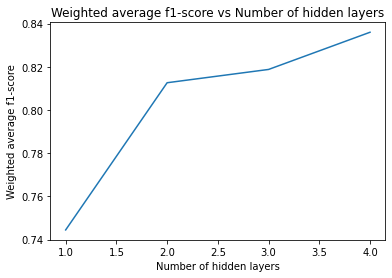

In [45]:
f_score
plt.plot([1,2,3,4], f_score)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden layers")
plt.savefig("results/part_c/weighted_f_vs_hidden_layers.png")

In [90]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
f_score = []
acc_list = []
for layer_info in layers_to_test:
    result = "results/part_d/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_sigmoid"
    report = pd.read_csv(result + '.csv')
    f_score.append(report.iloc[7]['f1-score'])
    acc_list.append(report.iloc[5][1])

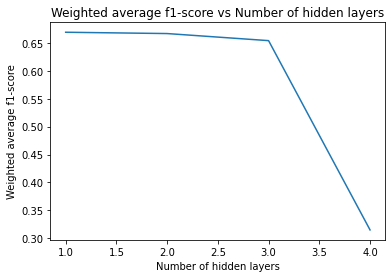

In [91]:
f_score
plt.plot([1,2,3,4], f_score)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden layers")
plt.savefig("results/part_d/weighted_f_vs_hidden_layers.png")

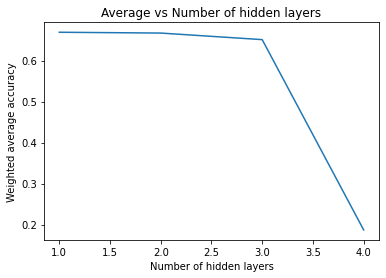

In [92]:
f_score
plt.plot([1,2,3,4], acc_list)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average accuracy")
plt.title("Average vs Number of hidden layers")
plt.savefig("results/part_d/average_accuracy_vs_hidden_layers.png")


In [57]:
result = 'train_model_H_1024_512_5_EPOCH_1000_BATCH_32_activation_relu'
report = pd.read_csv('results/part_e/' + result + '.csv')

In [58]:
dfi.export(report, 'results/part_e/' + result + ".png")

In [59]:
layers_to_test = [[1024, 512 , 5], [1024, 512, 256 , 5], [1024, 512, 256, 128 , 5] , [1024, 512, 256, 128, 64 , 5]]
f_score = []
acc_list = []
for layer_info in layers_to_test:
    result = "results/part_e/model_H_" + "_".join([str(i) for i in layer_info]) + "_EPOCH_" + str(1000)+"_BATCH_32_activation_relu"
    report = pd.read_csv(result + '.csv')
    f_score.append(report.iloc[7]['f1-score'])
    acc_list.append(report.iloc[5][1])

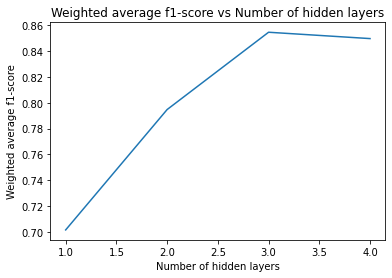

In [60]:
f_score
plt.plot([1,2,3,4], f_score)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden layers")
plt.savefig("results/part_e/weighted_f_vs_hidden_layers.png")

In [82]:
layers_to_test = [[ 512], [ 512, 256], [ 512, 256, 128] , [ 512, 256, 128, 64 ]]
f_score = []
acc_list = []
for layer_info in layers_to_test:
    result = "results/part_f/model_H_" + "_".join([str(i) for i in layer_info]) + "_BATCH_EPOCH_1000_32_activation_relu"
    print(result)
    report = pd.read_csv(result + '.csv')
    f_score.append(report.iloc[7]['f1-score'])
    acc_list.append(report.iloc[5][1])

results/part_f/model_H_512_BATCH_EPOCH_1000_32_activation_relu
results/part_f/model_H_512_256_BATCH_EPOCH_1000_32_activation_relu
results/part_f/model_H_512_256_128_BATCH_EPOCH_1000_32_activation_relu
results/part_f/model_H_512_256_128_64_BATCH_EPOCH_1000_32_activation_relu


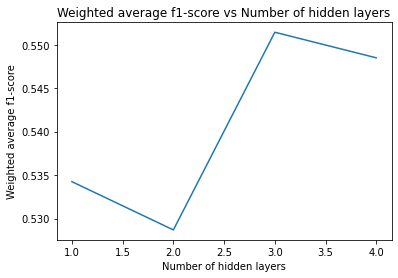

In [83]:
f_score
plt.plot([1,2,3,4], f_score)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average f1-score")
plt.title("Weighted average f1-score vs Number of hidden layers")
plt.savefig("results/part_f/weighted_f_vs_hidden_layers.png")

In [76]:
report

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.973799,0.547912,0.701258,407.000
1,1,0.106061,0.466667,0.172840,45.000
2,2,0.045226,0.428571,0.081818,21.000
3,3,0.096257,0.163636,0.121212,110.000
4,4,0.930481,0.417266,0.576159,417.000
5,accuracy,0.445000,0.445000,0.445000,0.445
6,macro avg,0.430365,0.404810,0.330657,1000.000
7,weighted avg,0.800658,0.445000,0.548500,1000.000


In [84]:
acc_list

[0.48, 0.445, 0.478, 0.445]

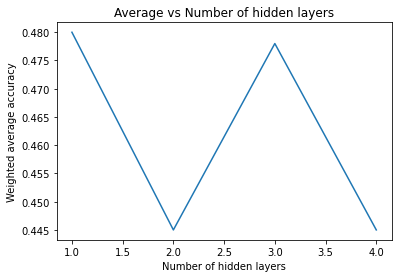

In [85]:
f_score
plt.plot([1,2,3,4], acc_list)
plt.xlabel("Number of hidden layers")
plt.ylabel("Weighted average accuracy")
plt.title("Average vs Number of hidden layers")
plt.savefig("results/part_f/average_accuracy_vs_hidden_layers.png")
